## Video 4.1 - Exploratory Analysis of the Titanic Data Set

In [24]:
import pandas as pd
import seaborn as sns
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

fname = 'train.csv'
data = pd.read_csv(fname)

titanic_df = pd.read_csv(fname)

test_df    = pd.read_csv("test.csv")

#titanic_df = pd.read_csv("../input/train.csv")
# test_df    = pd.read_csv("../input/test.csv")

In [25]:
len(titanic_df)

891

In [26]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Dictionary
- `PassengerId`: serial ID
- `Survived`: 1=survived, 0=didn't survive
- `Pclass`: passenger class (1, 2, or 3)
- `Name`: full name of the passenger
- `Sex`: male or female
- `Age`: age in years
- `SibSp`: # of siblings or spouses aboard the Titanic
- `Parch`: # of parents of children aboard the Titanic
- `Ticket`: ticket number
- `Fare`: passenger fare
- `Cabin`: cabin number
- `Embarked`: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [14]:
titanic_df.shape

(891, 12)

### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [28]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [29]:
data['Age'].min(), data['Age'].max()

(0.41999999999999998, 80.0)

In [30]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
data['Survived'].value_counts() * 100 / len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [32]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [36]:
bar_chart('Sex')

NameError: name 'train' is not defined

In [ ]:
data['Pclass'].value_counts()

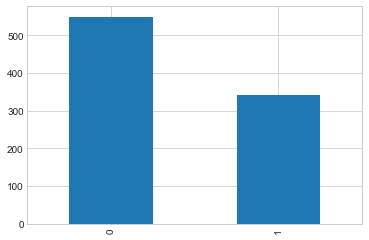

In [33]:
%matplotlib inline

alpha_color = 0.5

data['Survived'].value_counts().plot(kind='bar')

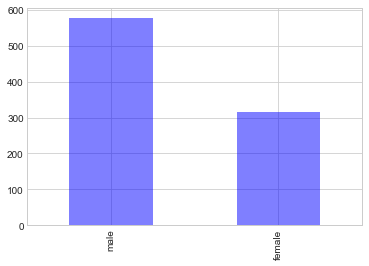

In [34]:
data['Sex'].value_counts().plot(kind='bar',
                                color=['b', 'r'],
                                alpha=alpha_color)

In [ ]:
data['Pclass'].value_counts().sort_index().plot(kind='bar',
                                                alpha=alpha_color)

In [ ]:
data.plot(kind='scatter', x='Survived', y='Age')

In [ ]:
data[data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

data['AgeBin'] = pd.cut(data['Age'], bins)

In [ ]:
data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

In [ ]:
data[data['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

In [ ]:
data['AgeBin'].value_counts().sort_index().plot(kind='bar')

In [ ]:
data[data['Pclass'] == 1]['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[data['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[data['Sex'] == 'male']['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[data['Sex'] == 'female']['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

In [ ]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

NameError: name 'test_df' is not defined

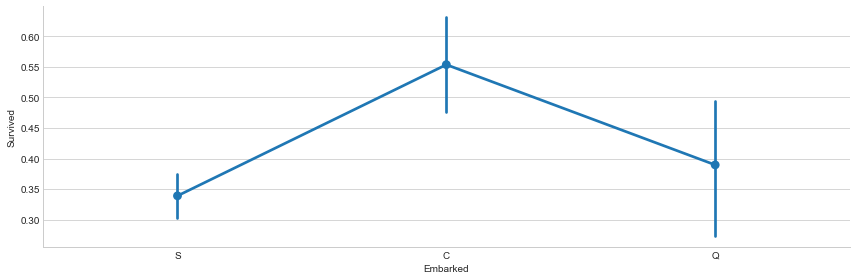

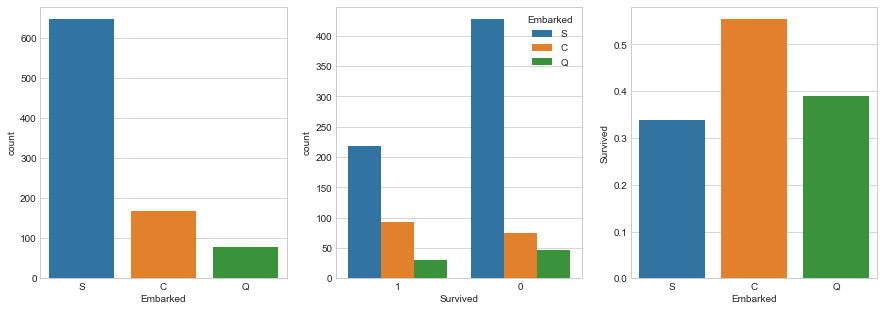

In [23]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [ ]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [ ]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

In [ ]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [ ]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

### 2.4.2 A heat map of correlation may give us a understanding of which variables are important

In [ ]:
plot_correlation_map( titanic )